In [86]:
import numpy as np
import pandas as pd
from scipy import stats
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import random
import scipy
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import statsmodels.api as stm
import statsmodels
import arch.data.frenchdata
import matplotlib.pyplot as plt
from arch.unitroot import VarianceRatio
from hurst import compute_Hc, random_walk
import warnings
warnings.filterwarnings("ignore")

## Percentiles

In [35]:
def Percentile2(df, q, excelName):
    writer = pd.ExcelWriter(excelName,engine='xlsxwriter')
    for i in range (0,len(df.sheet_names)):
      df_sheet = df.parse(i)
      percentile = df_sheet.quantile(q, axis=0, numeric_only=True, interpolation='linear')
      percentile.insert(0,'Percentiles',q)
      percentile.to_excel(writer,sheet_name=str(df.sheet_names[i]), index= False)
      print(df.sheet_names[i],' processed ', i+1,'/',len(df.sheet_names))
    writer.save()
    print('Saved as: ',excelName)

In [36]:
pval_all= pd.ExcelFile('/Users/Catalina/Desktop/crypto_jumps/Data_All_pval.xlsx')
pval_nojumps= pd.ExcelFile('/Users/Catalina/Desktop/crypto_jumps/nojumps_pval.xlsx')

In [37]:
Percentile2(pval_all, [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,  0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1], 'percentile_all_1%')

BITFINEX_BTC  processed  1 / 34
COINBASE_BTC  processed  2 / 34
COINBASE_ETH  processed  3 / 34
BITFINEX_ETH  processed  4 / 34
BITFINEX_XRP  processed  5 / 34
BITSTAMP_XRP  processed  6 / 34
BITFINEX_BCH  processed  7 / 34
COINBASE_BCH  processed  8 / 34
BITFINEX_EOS  processed  9 / 34
KRAKEN_EOS  processed  10 / 34
COINBASE_LTC  processed  11 / 34
BITFINEX_LTC  processed  12 / 34
KRAKEN_XLM  processed  13 / 34
CEXIO_XLM  processed  14 / 34
BITFINEX_NEO  processed  15 / 34
QUOINE_NEO  processed  16 / 34
BITFINEX_XMR  processed  17 / 34
KRAKEN_XMR  processed  18 / 34
BITFINEX_DASH  processed  19 / 34
EXMO_DASH  processed  20 / 34
YOBIT_XEM  processed  21 / 34
LIVECOIN_XEM  processed  22 / 34
BITFINEX_TRX  processed  23 / 34
YOBIT_TRX  processed  24 / 34
KRAKENT  processed  25 / 34
EXMOT  processed  26 / 34
LIVECOIN_VEN  processed  27 / 34
YOBIT_VEN  processed  28 / 34
KRAKEN_ETC  processed  29 / 34
BITFINEX_QTUM  processed  30 / 34
BITFINEX_OMG  processed  31 / 34
YOBIT_LSK  processed 

In [38]:
Percentile2(pval_nojumps, [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,  0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1], 'percentile_no_jumps_1%')

no_jumps_bitfinex  processed  1 / 2
no_jumps_coinbase  processed  2 / 2
Saved as:  percentile_no_jumps_1%


## PDF Plot

In [70]:
q_comparison= pd.read_excel('/Users/Catalina/Desktop/crypto_jumps/quantile_comp2.xlsx', sheet_name='LjungBox_BTC_Bitfinex')

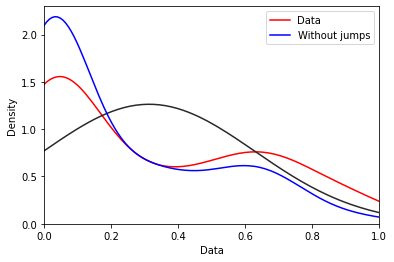

In [63]:
# plotting both distibutions on the same figure
fig = sns.distplot(q_comparison['All Data'], fit=scipy.stats.norm, color="r",label='Data',kde=True,hist=False)
fig = sns.distplot(q_comparison['W/out Jumps'], color="b",label='Without jumps',kde=True,hist=False,axlabel='Data')
fig= (fig.set(xlim=(0,1)))
plt.legend()
plt.show()

In [41]:
def PlotPDF(df,title):
    sns.distplot(df['All Data'], fit=scipy.stats.norm, color="r",label='Data',kde=True,hist=False)
    sns.distplot(df['W/out Jumps'], color="b",label='Without jumps',kde=True,hist=False,axlabel='Data').set_title(title)
    plt.legend()
    plt.show()

In [42]:
def PlotPDF2(df):
    for i in range (0,len(df.sheet_names)):
     PlotPDF(df.parse(i),df.sheet_names[i])
    print('-------------------------------------')  

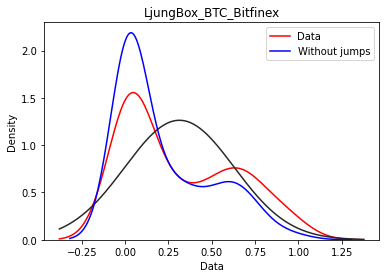

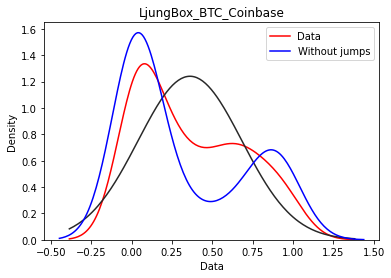

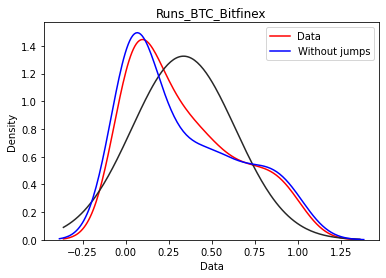

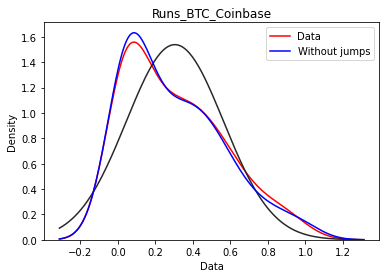

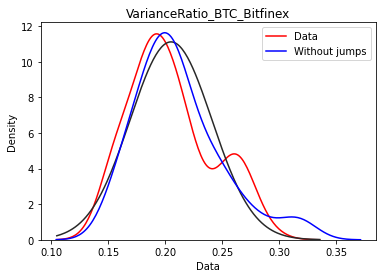

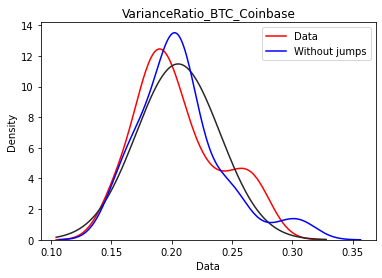

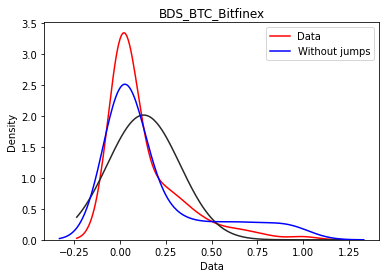

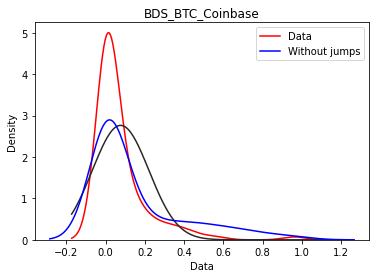

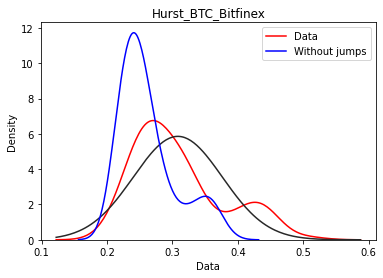

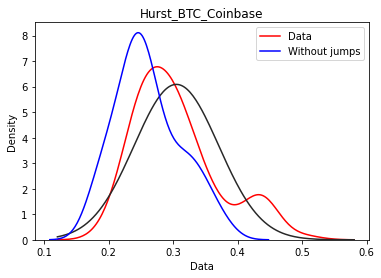

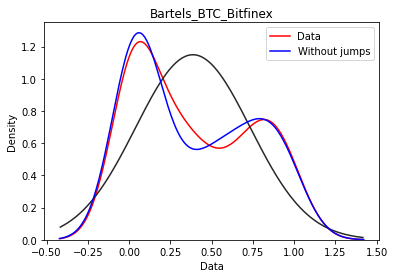

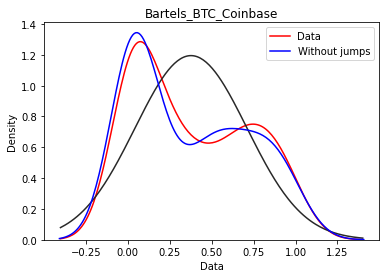

-------------------------------------


In [43]:
q_comparison= pd.ExcelFile('/Users/Catalina/Desktop/crypto_jumps/quantile_comp2.xlsx')
PlotPDF2(q_comparison)

## Distribution comparison

### Kolmogorov-Smirnov

In [76]:
def KSComparasion(df,alt):
    for i in df.sheet_names:
      arr = [0,0,0]
      df_sheet = df.parse(i)
      ks = stats.ks_2samp(df_sheet['All Data'], df_sheet['W/out Jumps'], alternative= alt, mode='auto')
      arr[0] = i
      arr[1] = round(ks.statistic,2)
      arr[2] = ks.pvalue
      print(arr)

In [46]:
KSComparasion(q_comparison, 'two-sided')

['LjungBox_BTC_Bitfinex', 0.14, 0.2819416298082479]
['LjungBox_BTC_Coinbase', 0.24, 0.0061340334218580265]
['Runs_BTC_Bitfinex', 0.1, 0.7020569828664881]
['Runs_BTC_Coinbase', 0.03, 0.9999999999962054]
['VarianceRatio_BTC_Bitfinex', 0.11, 0.5830090612540064]
['VarianceRatio_BTC_Coinbase', 0.12, 0.469506448503778]
['BDS_BTC_Bitfinex', 0.1, 0.7020569828664881]
['BDS_BTC_Coinbase', 0.14, 0.2819416298082479]
['Hurst_BTC_Bitfinex', 0.36, 3.751914289152195e-06]
['Hurst_BTC_Coinbase', 0.3, 0.0002248739317492479]
['Bartels_BTC_Bitfinex', 0.06, 0.9942356257694902]
['Bartels_BTC_Coinbase', 0.07, 0.9684099261397212]


In [52]:
KSComparasion(q_comparison, 'less')

['LjungBox_BTC_Bitfinex', 0.14, 0.14133965247090843]
['LjungBox_BTC_Coinbase', 0.24, 0.0030670167531708734]
['Runs_BTC_Bitfinex', 0.1, 0.3691083539077194]
['Runs_BTC_Coinbase', 0.03, 0.9143290114276991]
['VarianceRatio_BTC_Bitfinex', 0.06, 0.6987801650679035]
['VarianceRatio_BTC_Coinbase', 0.07, 0.6138816403400273]
['BDS_BTC_Bitfinex', 0.1, 0.3691083539077194]
['BDS_BTC_Coinbase', 0.06, 0.6987801650679035]
['Hurst_BTC_Bitfinex', 0.36, 1.8759571445760973e-06]
['Hurst_BTC_Coinbase', 0.3, 0.00011243696587464657]
['Bartels_BTC_Bitfinex', 0.06, 0.6987801650679035]
['Bartels_BTC_Coinbase', 0.07, 0.6138816403400273]


### Cramer von Mises

In [ ]:
def CMComparasion(df):
    for i in df.sheet_names:
      arr = [0,0,0]
      df_sheet = df.parse(i)
      cm = stats.cramervonmises_2samp(df_sheet['All Data'], df_sheet['W/out Jumps'])
      arr[0] = i
      arr[1] = round(cm.statistic,2)
      arr[2] = cm.pvalue
      print(arr)

## Unefficient part (p-val < 0.05)

In [82]:
uneff= pd.ExcelFile('/Users/Catalina/Desktop/crypto_jumps/uneff.xlsx')

In [83]:
KSComparasion(uneff, 'two-sided')

['LjungBox_BTC_Bitfinex', 0.24, 0.13630873162897766]
['LjungBox_BTC_Coinbase', 0.52, 4.497775279270436e-06]
['Runs_BTC_Bitfinex', 0.24, 0.3719644756055932]
['Runs_BTC_Coinbase', 0.1, 0.9999961038154768]
['BDS_BTC_Bitfinex', 0.17, 0.36743563987529626]
['BDS_BTC_Coinbase', 0.12, 0.730057999531788]
['Bartels_BTC_Bitfinex', 0.05, 0.9996892272702655]
['Bartels_BTC_Coinbase', 0.23, 0.41354510011947465]


In [89]:
KSComparasion(uneff, 'less')

['LjungBox_BTC_Bitfinex', 0.24, 0.06816954261501434]
['LjungBox_BTC_Coinbase', 0.52, 2.2488876396352187e-06]
['Runs_BTC_Bitfinex', 0.24, 0.18697170950491632]
['Runs_BTC_Coinbase', 0.05, 0.9545454545454546]
['BDS_BTC_Bitfinex', 0.17, 0.18477164879165656]
['BDS_BTC_Coinbase', 0.09, 0.586238800564308]
['Bartels_BTC_Bitfinex', 0.05, 0.7796915526020818]
['Bartels_BTC_Coinbase', 0.23, 0.20836146271517791]


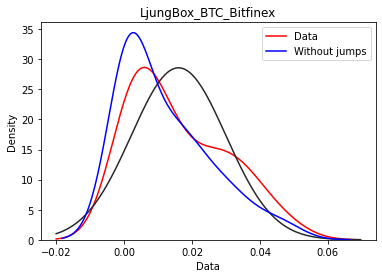

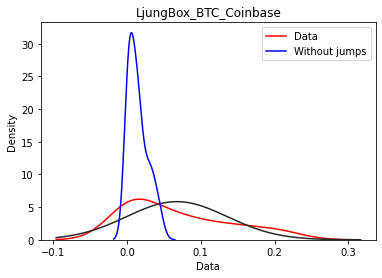

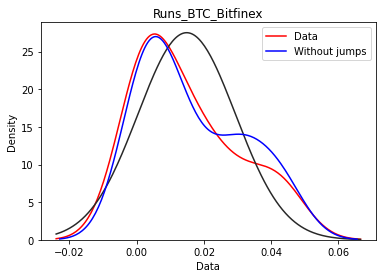

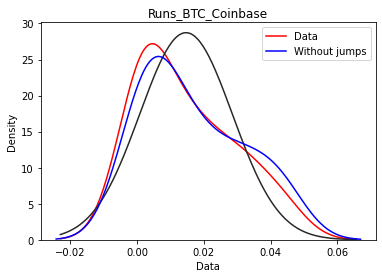

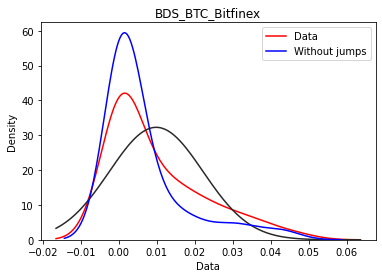

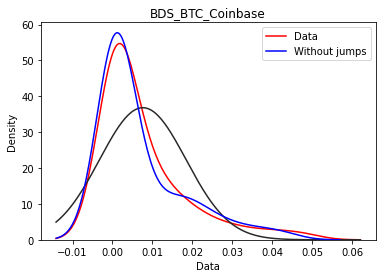

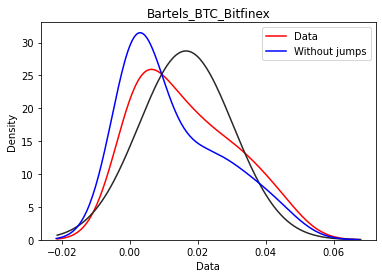

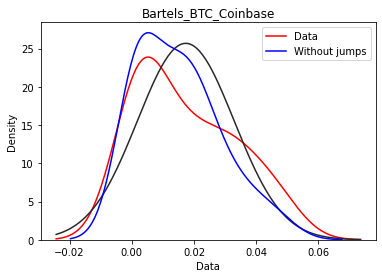

-------------------------------------


In [90]:
PlotPDF2(uneff)

## Eff (p-val> 0.05)

In [91]:
eff= pd.ExcelFile('/Users/Catalina/Desktop/crypto_jumps/eff.xlsx')

In [92]:
KSComparasion(eff, 'two-sided')

['LjungBox_BTC_Bitfinex', 0.11, 0.8285376116961467]
['LjungBox_BTC_Coinbase', 0.43, 9.984931424081294e-07]
['Runs_BTC_Bitfinex', 0.12, 0.6801596116769174]
['Runs_BTC_Coinbase', 0.04, 0.9999999985815169]
['BDS_BTC_Bitfinex', 0.16, 0.6249070014938026]
['BDS_BTC_Coinbase', 0.17, 0.5786001416508443]
['Bartels_BTC_Bitfinex', 0.1, 0.888835081546934]
['Bartels_BTC_Coinbase', 0.1, 0.893610782135864]


In [96]:
KSComparasion(eff, 'less')

['LjungBox_BTC_Bitfinex', 0.11, 0.45583224251583226]
['LjungBox_BTC_Coinbase', 0.01, 0.9871794871794872]
['Runs_BTC_Bitfinex', 0.04, 0.8916549460853258]
['Runs_BTC_Coinbase', 0.04, 0.8929426377597109]
['BDS_BTC_Bitfinex', 0.07, 0.8129776021080368]
['BDS_BTC_Coinbase', 0.17, 0.29644006418101126]
['Bartels_BTC_Bitfinex', 0.1, 0.5081872586750613]
['Bartels_BTC_Coinbase', 0.04, 0.8847226173541963]


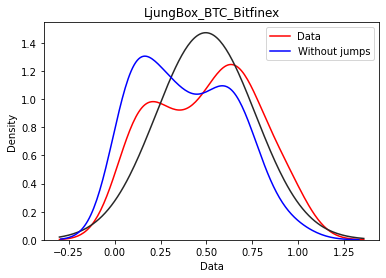

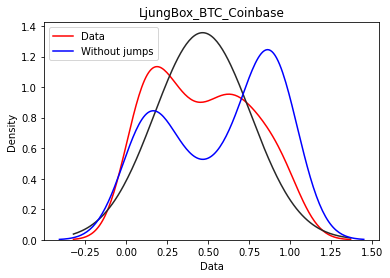

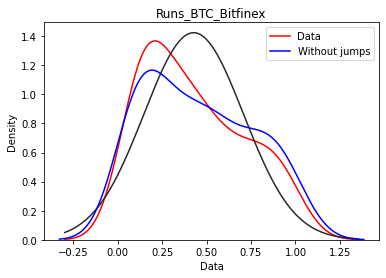

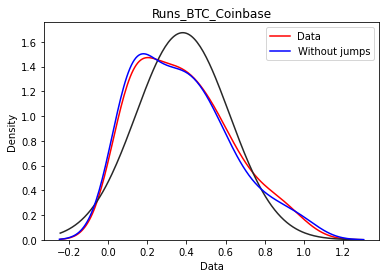

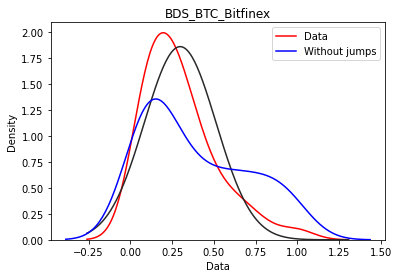

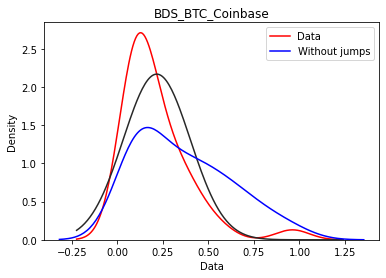

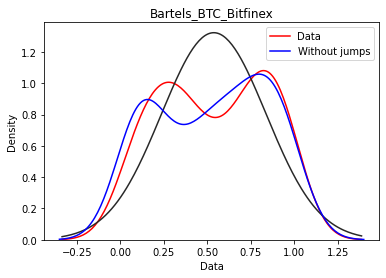

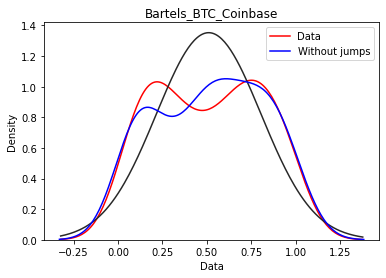

-------------------------------------


In [94]:
PlotPDF2(eff)